<a href="https://colab.research.google.com/github/relmarrakchy/Eeducation/blob/master/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing Pizza dataset :

In [3]:
dataset = pd.read_csv("/pizza_sales.csv")
dataset.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In the pizza dataset, we have no NaN values, but some data type seems incorrect.

In [7]:
dataset["quantity"] = dataset["quantity"].astype("int")
dataset["order_date"] = pd.to_datetime(dataset["order_date"], format="%d/%m/%Y")
dataset["pizza_size"] = dataset["pizza_size"].astype("category")
dataset["pizza_category"] = dataset["pizza_category"].astype("category")

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  float64       
 1   order_id           48620 non-null  float64       
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  category      
 9   pizza_category     48620 non-null  category      
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
dataset.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


Now, There's a doubt if the "pizza_name" column is also a category.

In [10]:
dataset["pizza_name"].nunique()

32

As we see, we 32 records that have a unique pizza name. So, we gonna consider it as a category too.

In [11]:
dataset["pizza_name"] = dataset["pizza_name"].astype("category")

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  float64       
 1   order_id           48620 non-null  float64       
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  category      
 9   pizza_category     48620 non-null  category      
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 3.5+ MB


Now, we gonna verify if the total_price of all the orders are corrects.

In [13]:
mask = dataset["unit_price"] * dataset["quantity"] != dataset["total_price"]

if mask.any():
  print("There's an error !")
else:
  print("All is good !")

All is good !


We make sure now that the total price of all the orders are correct. Now let's do some magic !

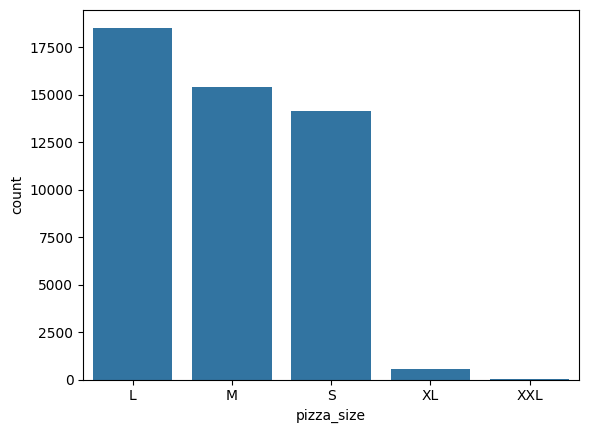

In [14]:
sns.countplot(data=dataset, x="pizza_size")
plt.show()

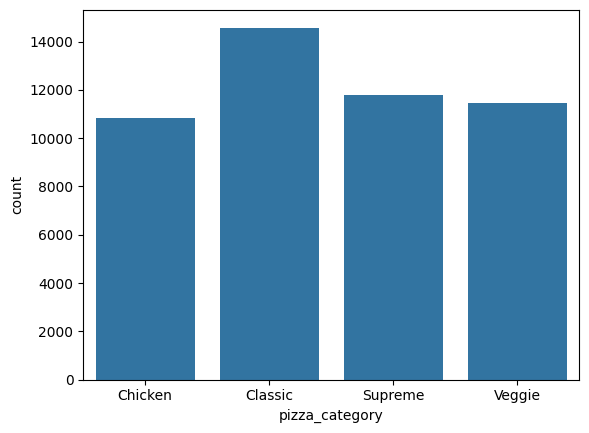

In [15]:
sns.countplot(data=dataset, x="pizza_category")
plt.show()

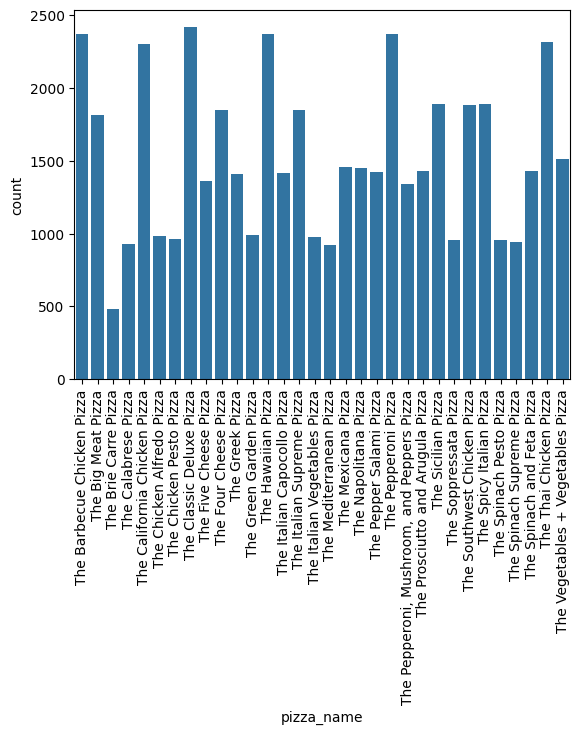

In [16]:
sns.countplot(data=dataset, x="pizza_name")
plt.xticks(rotation=90)
plt.show()

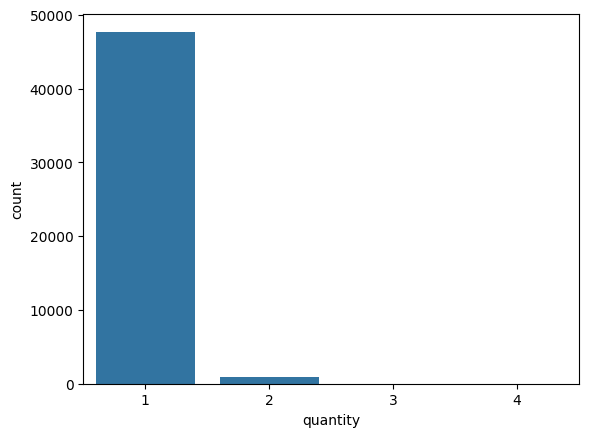

In [17]:
sns.countplot(data=dataset, x="quantity")
plt.show()

We know now that \:


*   The pizza size L is the more recommended.
*   People love the Classic pizza.
*   The Classic Deluxe Pizza setting on top.
* People are often ordered one Pizza.



**Now, let see which time of the day people are more ordring pizza.**

In [44]:
temp = dataset["order_time"].str.split(":")

classing = {}
for timing in temp:
  if timing[0] in classing:
    classing[timing[0]] += 1
  else:
    classing[timing[0]] = 1

classing = dict(sorted(classing.items()))

ordring_time = pd.DataFrame(list(classing.items()), columns=["Hour", "Number of orders"])
ordring_time

,Hour,Number of orders
0,10,17
1,11,2672
2,12,6543
3,13,6203
4,14,3521
5,15,3170
6,16,4185
7,17,5143
8,18,5359
9,19,4350


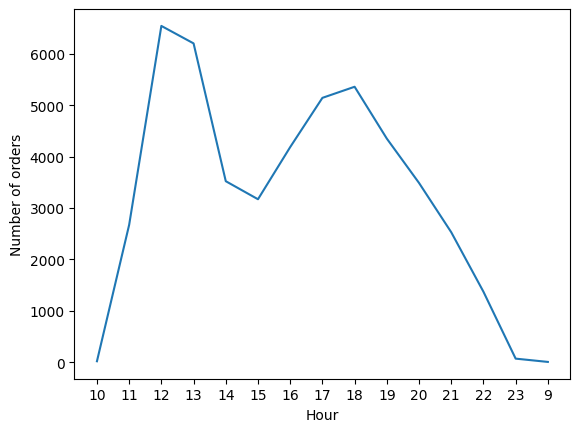

In [48]:
sns.lineplot(data=ordring_time, x="Hour", y="Number of orders")
plt.show()

As we see, people usually come in the afternoon and evening to buy pizza.